In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import zipfile
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
df = pd.read_csv('olist_order_reviews_dataset.csv')

In [3]:
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [4]:
df = df[['review_score' , 'review_comment_message']]


In [5]:
df

,review_score,review_comment_message
0,4,NaN
1,5,NaN
2,5,NaN
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
...,...,...
99219,5,NaN
99220,5,NaN
99221,5,"Excelente mochila, entrega super rápida. Super..."
99222,4,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_score            99224 non-null  int64 
 1   review_comment_message  40977 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [7]:
df.dropna(inplace=True)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_15180\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [8]:
df

,review_score,review_comment_message
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
9,4,aparelho eficiente. no site a marca do aparelh...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,5,"Vendedor confiável, produto ok e entrega antes..."
...,...,...
99205,4,para este produto recebi de acordo com a compr...
99208,5,Entregou dentro do prazo. O produto chegou em ...
99215,3,"O produto não foi enviado com NF, não existe v..."
99221,5,"Excelente mochila, entrega super rápida. Super..."


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='review_score', ylabel='count'>

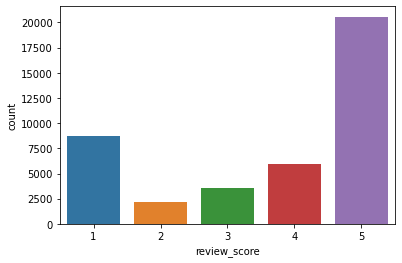

In [9]:
sns.countplot(df['review_score'])

# As you can see dataset is imbalanced one quike way is do delete some of the 5 starts comments [I will use], -> you should take a look
# to the different methods to handle imbalanced dataset

In [10]:
df.review_score.value_counts()


5    20554
1     8745
4     5976
3     3557
2     2145
Name: review_score, dtype: int64

In [11]:
df_ = df[df['review_score'] == 5].sample(8000)


In [12]:
df = df[df['review_score'] != 5]


In [13]:
df = pd.concat([df , df_])


In [14]:
df

,review_score,review_comment_message
9,4,aparelho eficiente. no site a marca do aparelh...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
16,2,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E..."
19,1,Péssimo
29,1,Não gostei ! Comprei gato por lebre
...,...,...
27826,5,O produto chegou no prazo certo.
48351,5,Ok
86393,5,O produto chegou muito antes do prazo e veio e...
87778,5,Pena que foram só seis garrafas...


In [15]:
df = df.sample(len(df))


In [16]:
df = df.reset_index().drop('index' , axis = 1)


<AxesSubplot:xlabel='count', ylabel='review_score'>

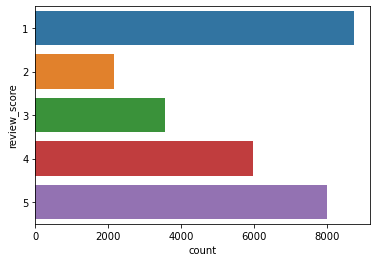

In [17]:
sns.countplot(y = df.review_score)


In [18]:
# lets at first convert into numpy arrays
reviews = np.array(df.review_comment_message , dtype  = 'str')
score = np.array(df.review_score , dtype  = 'int32')

In [19]:
reviews.shape

(28423,)

In [20]:
score.shape

(28423,)

In [21]:
split_ratio = 0.8
split_size =int( split_ratio * len(df))

In [22]:
split_size

22738

In [23]:
len(df)

28423

In [24]:
x_train , y_train =  reviews[:split_size] ,score[:split_size]
x_test , y_test =  reviews[split_size:] ,score[split_size:]

In [25]:
x_train.shape

(22738,)

In [26]:
y_train.shape

(22738,)

In [27]:
x_test.shape

(5685,)

In [28]:
y_test.shape

(5685,)

# Tokenizing

In [29]:
tokenizer = Tokenizer(num_words=10_000 , oov_token='<OOV>')


In [30]:
tokenizer.fit_on_texts(x_train)


In [31]:
train_sequences = tokenizer.texts_to_sequences(x_train) 


In [32]:
test_sequences = tokenizer.texts_to_sequences(x_test) 


In [33]:
max_len = 200


In [34]:
pad_train = pad_sequences(train_sequences , maxlen = max_len) 


In [35]:
pad_test = pad_sequences(test_sequences , maxlen = max_len)


In [36]:
y_train_label = to_categorical(y_train)


In [37]:
y_test_label = to_categorical(y_test)


In [38]:
y_train_label.shape # 6 but we are only having 5 scores (stars) .. 


(22738, 6)

In [39]:
y_test_label.shape


(5685, 6)

In [40]:
y_train_label = y_train_label[: , 1:]
y_test_label = y_test_label[: , 1:]

In [41]:
y_test_label.shape


(5685, 5)

# Modeling

In [42]:
    dims = 16
    embeddings = 10_000


In [43]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(embeddings,dims),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32 , return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512 , activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(256 , activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64 , activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5 , activation = 'softmax')
])




model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         12544     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               66048     
                                                        

In [44]:
model.compile(loss = 'categorical_crossentropy', optimizer  = 'adam', metrics = ['accuracy'])

In [45]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [46]:
history = model.fit(pad_train , y_train_label , epochs = 30 , validation_split = 0.05,callbacks=[early_stopping])


Epoch 1/30
676/676 [==============================] - 441s 644ms/step - loss: 1.1549 - accuracy: 0.5416 - val_loss: 1.2837 - val_accuracy: 0.4521
Epoch 2/30
676/676 [==============================] - 350s 517ms/step - loss: 1.0076 - accuracy: 0.5984 - val_loss: 2.9497 - val_accuracy: 0.3536
Epoch 3/30
676/676 [==============================] - 331s 489ms/step - loss: 0.9414 - accuracy: 0.6250 - val_loss: 1.0671 - val_accuracy: 0.5919
Epoch 4/30
676/676 [==============================] - 326s 483ms/step - loss: 0.8768 - accuracy: 0.6459 - val_loss: 1.1117 - val_accuracy: 0.5752
Epoch 5/30
676/676 [==============================] - 336s 497ms/step - loss: 0.8194 - accuracy: 0.6695 - val_loss: 1.4320 - val_accuracy: 0.5004
Epoch 6/30
676/676 [==============================] - 324s 479ms/step - loss: 0.7672 - accuracy: 0.6879 - val_loss: 1.2179 - val_accuracy: 0.5954


# Overfitting Check

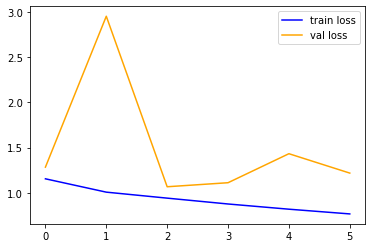

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss , 'b' , label = 'train loss')
plt.plot(val_loss , 'orange' , label = 'val loss')

plt.legend()
plt.show()


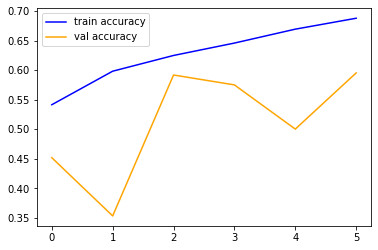

In [48]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(accuracy , 'b' , label = 'train accuracy')
plt.plot(val_accuracy , 'orange' , label = 'val accuracy')

plt.legend()
plt.show()

# Evaluation

In [49]:
model.evaluate(pad_test , y_test_label )


178/178 [==============================] - 21s 116ms/step - loss: 1.0783 - accuracy: 0.5875


[1.0782945156097412, 0.5875110030174255]